In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
train_data = pd.read_csv("Loan_Prediction/Train_DF.csv")
test_data = pd.read_csv("Loan_Prediction/Test_DF.csv")

In [8]:
## To get a general idea of what the train_data entails.
train_data.head()

,Loan_ID,Nos_Dep,Education,Self_employed,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
0,1,0.0,Not Graduate,Yes,4100000,12200000.0,8.0,417,2700000,2200000,8800000.0,3300000,0
1,2,3.0,Graduate,No,9100000,29700000.0,20.0,506,7100000,4500000,33300000.0,12800000,0
2,3,3.0,Graduate,No,8200000,30700000.0,8.0,467,18200000,3300000,23300000.0,7900000,0
3,4,5.0,Not Graduate,Yes,9800000,NaN,20.0,382,12400000,8200000,NaN,5000000,0
4,5,0.0,Graduate,Yes,4800000,NaN,10.0,319,6800000,8300000,13700000.0,5100000,0


In [10]:
## To display information about the `train_data` DataFrame.
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2774 entries, 0 to 2773
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Loan_ID                   2774 non-null   int64  
 1    Nos_Dep                   2748 non-null   float64
 2    Education                 2774 non-null   object 
 3    Self_employed             2500 non-null   object 
 4    Annual_income             2774 non-null   int64  
 5    Loan_amount               2678 non-null   float64
 6    Loan_Term                 2719 non-null   float64
 7    Cibil_score               2774 non-null   int64  
 8    Residential_assets_value  2774 non-null   int64  
 9    Commercial_assets_value   2774 non-null   int64  
 10   Luxury_assets_value       2563 non-null   float64
 11   Bank_asset_value          2774 non-null   int64  
 12   Loan_status               2774 non-null   int64  
dtypes: float64(4), int64(7), object(2)
memory usage:

In [12]:
## Let us get some descriptive statistics of the data in the DataFrame.
train_data.describe()

,Loan_ID,Nos_Dep,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
count,2774.000000,2748.000000,2.774000e+03,2.678000e+03,2719.000000,2774.000000,2.774000e+03,2.774000e+03,2.563000e+03,2.774000e+03,2774.000000
mean,1387.500000,2.527656,5.064600e+06,1.514907e+07,10.856565,600.206200,7.602307e+06,4.929416e+06,1.509415e+07,4.988753e+06,0.622206
std,800.929148,1.680841,2.817096e+06,9.071626e+06,5.754803,172.761227,6.589467e+06,4.390455e+06,9.149344e+06,3.289841e+06,0.484923
min,1.000000,0.000000,2.000000e+05,3.000000e+05,2.000000,300.000000,-1.000000e+05,0.000000e+00,3.000000e+05,0.000000e+00,0.000000
25%,694.250000,1.000000,2.600000e+06,7.700000e+06,6.000000,455.000000,2.300000e+06,1.300000e+06,7.500000e+06,2.300000e+06,0.000000
50%,1387.500000,3.000000,5.100000e+06,1.450000e+07,10.000000,599.500000,5.700000e+06,3.650000e+06,1.440000e+07,4.500000e+06,1.000000
75%,2080.750000,4.000000,7.500000e+06,2.157500e+07,16.000000,749.000000,1.150000e+07,7.600000e+06,2.150000e+07,7.200000e+06,1.000000
max,2774.000000,5.000000,9.900000e+06,3.950000e+07,48.000000,900.000000,2.910000e+07,1.940000e+07,3.910000e+07,1.470000e+07,1.000000


In [14]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1495 entries, 0 to 1494
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0    Loan_ID                   1495 non-null   int64  
 1    Nos_Dep                   1487 non-null   float64
 2    Education                 1495 non-null   object 
 3    Self_employed             1341 non-null   object 
 4    Annual_income             1495 non-null   int64  
 5    Loan_amount               1445 non-null   float64
 6    Loan_Term                 1459 non-null   float64
 7    Cibil_score               1495 non-null   int64  
 8    Residential_assets_value  1495 non-null   int64  
 9    Commercial_assets_value   1495 non-null   int64  
 10   Luxury_assets_value       1381 non-null   float64
 11   Bank_asset_value          1495 non-null   int64  
 12   Loan_status               1495 non-null   float64
dtypes: float64(5), int64(6), object(2)
memory usage:

In [16]:
train_data.columns

Index([' Loan_ID', ' Nos_Dep', ' Education', ' Self_employed',
       ' Annual_income', ' Loan_amount', ' Loan_Term', ' Cibil_score',
       ' Residential_assets_value', ' Commercial_assets_value',
       ' Luxury_assets_value', ' Bank_asset_value', ' Loan_status'],
      dtype='object')

In [9]:
## Except loan_id, all the column names contain a space in front of the text, we need refactor to avoid confusions.
train_data.columns = train_data.columns.str.replace(' ', '')
test_data.columns = test_data.columns.str.replace(' ', '')

In [61]:
train_data["Loan_status"].value_counts()

1    1726
0    1048
Name: Loan_status, dtype: int64

## We can say the data is slightly imbalance but still fair. so our model wont be biased.

In [59]:
data = pd.concat([train_data,test_data])
data = data.reset_index()

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   index                     4269 non-null   int64  
 1   Loan_ID                   4269 non-null   int64  
 2   Nos_Dep                   4235 non-null   float64
 3   Education                 4269 non-null   object 
 4   Self_employed             3841 non-null   object 
 5   Annual_income             4269 non-null   int64  
 6   Loan_amount               4123 non-null   float64
 7   Loan_Term                 4178 non-null   float64
 8   Cibil_score               4269 non-null   int64  
 9   Residential_assets_value  4269 non-null   int64  
 10  Commercial_assets_value   4269 non-null   int64  
 11  Luxury_assets_value       3944 non-null   float64
 12  Bank_asset_value          4269 non-null   int64  
 13  Loan_status               4269 non-null   float64
dtypes: float

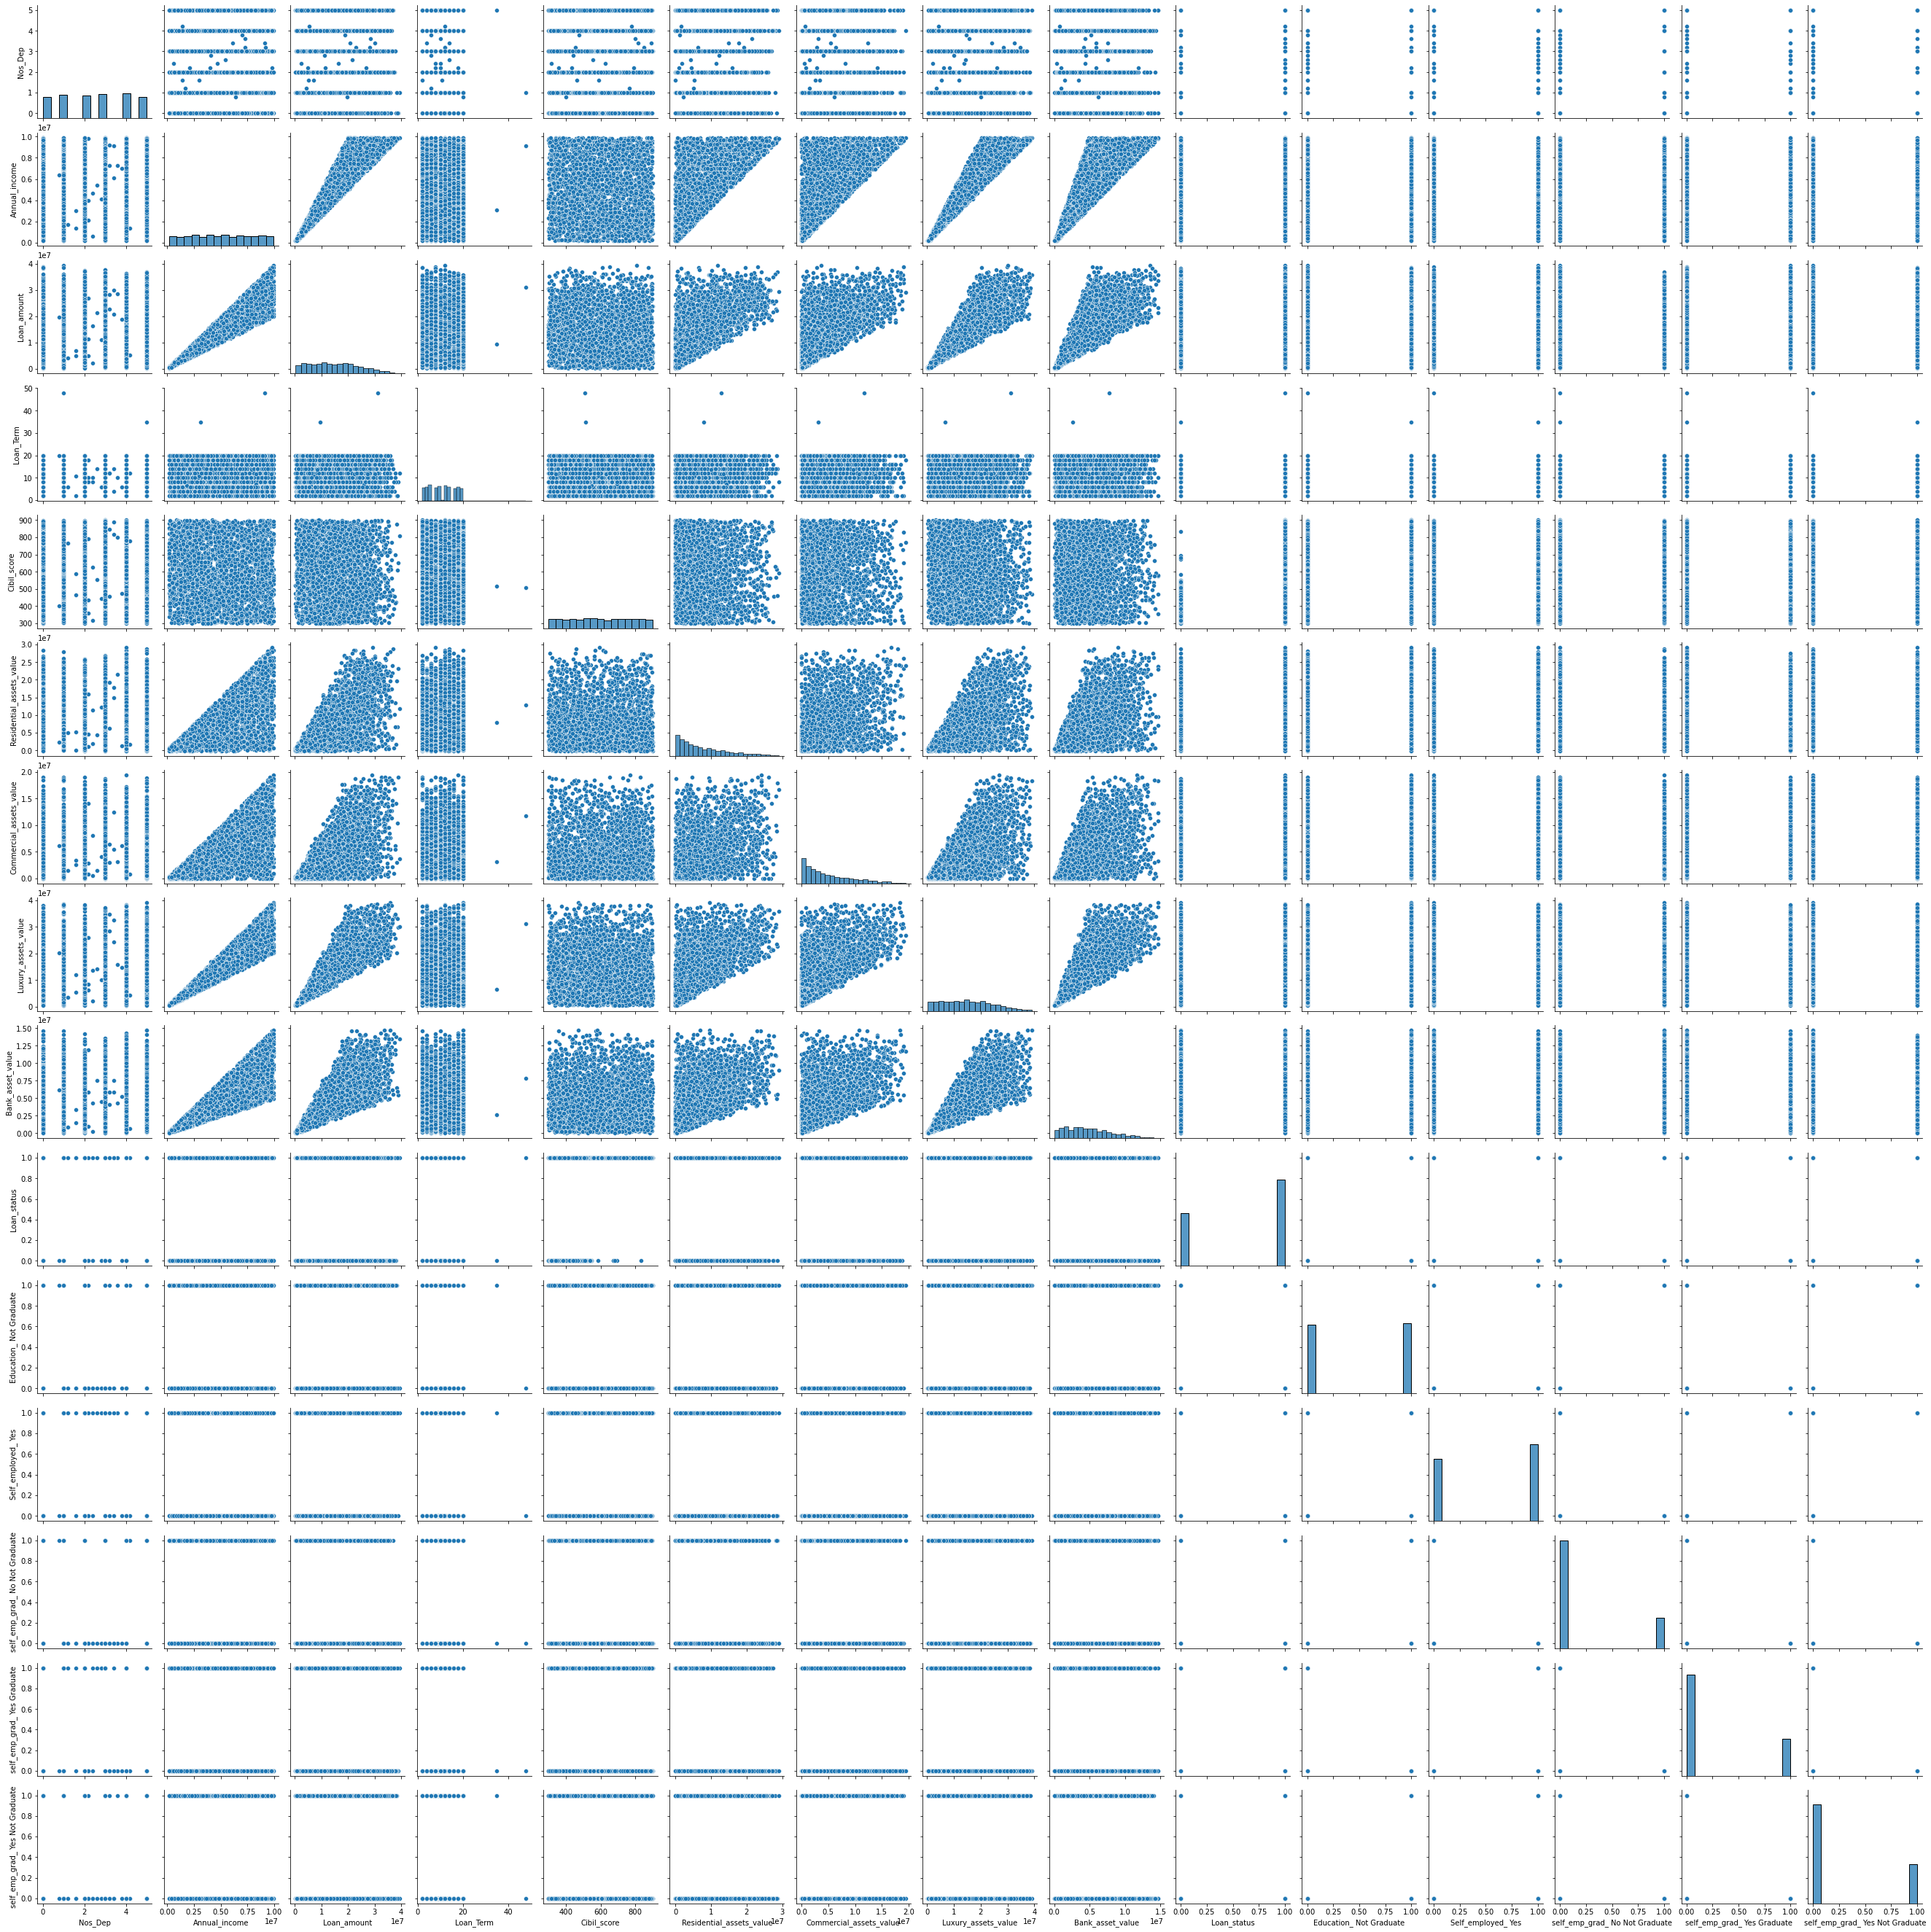

In [82]:
sns.pairplot(train_data)

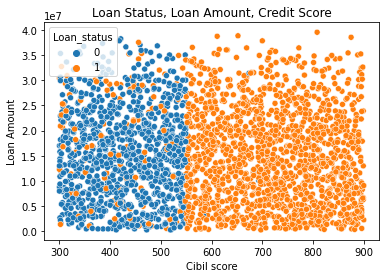

In [15]:
## Let us see how the Loan amount and Cibil scor affect the Loan status
sns.scatterplot(x=train_data['Cibil_score'], y= train_data['Loan_amount'], hue=train_data['Loan_status'])
plt.title("Loan Status, Loan Amount, Credit Score")
plt.xlabel("Cibil score")
plt.ylabel("Loan Amount")
plt.show()

## It can be deduced from the plot that the credit scores around 540 - 550 separate the loan status into two parts in a very clear way. In the other words, the loan status is highly related to the credit score.

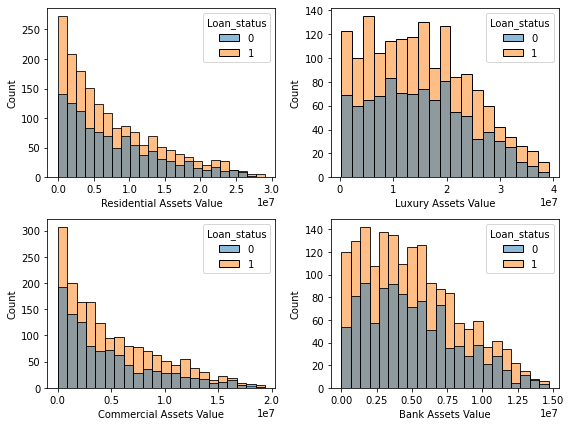

In [29]:
##  Let us see the relationship of the loan_status with these assets, residential_assets_value, commercial_assets_value, luxury_assets_value, bank_asset_value

fig,axes = plt.subplots(2, 2, figsize = (8, 6))

sns.histplot(train_data, x = 'Residential_assets_value', hue = 'Loan_status', ax = axes[0,0])
axes[0,0].set_xlabel("Residential Assets Value")
axes[0,0].set_ylabel("Count")

sns.histplot(train_data, x = 'Commercial_assets_value', hue = 'Loan_status', ax = axes[1,0])
axes[1,0].set_xlabel("Commercial Assets Value")
axes[1,0].set_ylabel("Count")

sns.histplot(train_data, x = 'Luxury_assets_value', hue = 'Loan_status', ax = axes[0,1])
axes[0,1].set_xlabel("Luxury Assets Value")
axes[0,1].set_ylabel("Count")

sns.histplot(train_data, x = 'Bank_asset_value', hue = 'Loan_status', ax = axes[1,1])
axes[1,1].set_xlabel("Bank Assets Value")
axes[1,1].set_ylabel("Count")

plt.tight_layout()
plt.show()

## Both approved and rejected loans have the same trends based on the different assets values, there is no strong relationship between the loan status and any of these assets in the histogram. The cibil_score still our best bet.

In [26]:
## Let us create a list called `null_cols` that contains the column names of the `train_data` DataFrame where there are missing values.
null_cols = [cols for cols in train_data.columns if train_data[cols].isna().sum() > 0]

In [28]:
null_cols

['Nos_Dep', 'Self_employed', 'Loan_amount', 'Loan_Term', 'Luxury_assets_value']

In [30]:
data.corr()

,index,Loan_ID,Nos_Dep,Annual_income,Loan_amount,Loan_Term,Cibil_score,Residential_assets_value,Commercial_assets_value,Luxury_assets_value,Bank_asset_value,Loan_status
index,1.000000,1.000000,0.006171,0.006938,0.000810,0.002759,0.015881,0.029071,0.009934,-0.010206,0.012423,0.261580
Loan_ID,1.000000,1.000000,0.006171,0.006938,0.000810,0.002759,0.015881,0.029071,0.009934,-0.010206,0.012423,0.261580
Nos_Dep,0.006171,0.006171,1.000000,0.008824,-0.000030,-0.020789,-0.010215,0.008497,-0.000056,-0.001300,0.012231,0.002693
Annual_income,0.006938,0.006938,0.008824,1.000000,0.927463,0.011990,-0.023034,0.636841,0.640328,0.929892,0.851093,-0.003733
Loan_amount,0.000810,0.000810,-0.000030,0.927463,1.000000,0.008275,-0.016231,0.593381,0.599582,0.863636,0.788634,0.009337
Loan_Term,0.002759,0.002759,-0.020789,0.011990,0.008275,1.000000,0.005868,0.008295,-0.003389,0.019346,0.016689,-0.079765
Cibil_score,0.015881,0.015881,-0.010215,-0.023034,-0.016231,0.005868,1.000000,-0.019947,-0.003769,-0.027802,-0.015478,0.499570
Residential_assets_value,0.029071,0.029071,0.008497,0.636841,0.593381,0.008295,-0.019947,1.000000,0.414786,0.591489,0.527418,0.004886
Commercial_assets_value,0.009934,0.009934,-0.000056,0.640328,0.599582,-0.003389,-0.003769,0.414786,1.000000,0.589087,0.548576,0.011620
Luxury_assets_value,-0.010206,-0.010206,-0.001300,0.929892,0.863636,0.019346,-0.027802,0.591489,0.589087,1.000000,0.793214,-0.003371


#### Some Feature Engineering with Categorical Features

In [71]:
## Let us impport the `SimpleImputer` class from the `sklearn.impute` module and uses it to impute missing values in the "Self_employed" column of a DataFrame called `data`
from sklearn.impute import SimpleImputer
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
data["Self_employed"] = imp_mode.fit_transform(data[["Self_employed"]])

In [73]:
data["self_emp_grad"] = data["Self_employed"] + data["Education"]

#### Missing Value Imputation and One-Hot Encoding

In [67]:
## Let us iterate over the columns of the Datafeame data and check the data type of object and print unique values of each.
cat_cols = [cols for cols in data.columns if data[cols].dtype == "O"]
for cols in cat_cols:
    print(f"The number of unique values in {cols} is {data[cols].unique()}")

The number of unique values in Education is [' Not Graduate' ' Graduate']
The number of unique values in Self_employed is [' Yes' ' No' nan]


In [75]:
## To create dummy variables for categorical columns in a DataFrame.
data = pd.get_dummies(data, columns = ["Education","Self_employed","self_emp_grad"], drop_first = True)

In [77]:
## Imputing missing values
from sklearn.impute import KNNImputer
imputer = KNNImputer()
data = pd.DataFrame(imputer.fit_transform(data), columns = data.columns)

In [79]:
## Loan_ID and index are not useful to us
data = data.drop(columns = ["index","Loan_ID"])

#### Base Model without feature Engineering

In [81]:
## Splitting the data back
train_data = data[:train_data.shape[0]]
test_data = data[train_data.shape[0]:]

In [46]:
train_data.shape

(2774, 15)

In [48]:
!pip install lazypredict

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels


In [50]:
train_data.columns

Index(['Nos_Dep', 'Annual_income', 'Loan_amount', 'Loan_Term', 'Cibil_score',
       'Residential_assets_value', 'Commercial_assets_value',
       'Luxury_assets_value', 'Bank_asset_value', 'Loan_status',
       'Education_ Not Graduate', 'Self_employed_ Yes',
       'self_emp_grad_ No Not Graduate', 'self_emp_grad_ Yes Graduate',
       'self_emp_grad_ Yes Not Graduate'],
      dtype='object')

In [91]:
## Now splitting the dataset into training and testing sets using the `train_test_split` function from the `sklearn.model_selection`
from sklearn.model_selection import train_test_split

features = train_data.drop('Loan_status', axis = 1)
target = train_data['Loan_status']

X_train, X_test, y_train, y_test = train_test_split(features, target,test_size = 0.2,random_state = 123)


In [89]:
## Importing the `LGBMClassifier` model from the `lightgbm` library to model our test data.
from sklearn.metrics._plot.confusion_matrix import confusion_matrix
from sklearn.metrics import classification_report, f1_score
import lightgbm as lgbm
model = lgbm.LGBMClassifier()
model.fit(X_train, y_train)
lgbm_prediction = model.predict(X_test)

print(classification_report(y_test, lgbm_prediction), "\n")
print(confusion_matrix(y_test, lgbm_prediction), "\n")
print(f1_score(y_test, lgbm_prediction), "\n")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 1381, number of negative: 838
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000211 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1442
[LightGBM] [Info] Number of data points in the train set: 2219, number of used features: 14
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.622352 -> initscore=0.499545
[LightGBM] [Info] Start training from score 0.499545
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
              precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       210
         1.0       1.00      0.99      0.99       345

    accuracy                           0.99       555
   macro avg       0.99      0.99      0.99       555
weighted a

## The LGBMClassifier model has already performed well.

#### Feature Importance and Model Explainability

In [58]:
!pip install shap

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
     |████████████████████████████████| 532 kB 21.0 MB/s eta 0:00:01


In [60]:
## Using the SHAP library to generally visualize the data once more.
import shap
explainer_lgbm = shap.Explainer(model.predict, X_test)
shap_values_lgbm = explainer_lgbm(X_test)
shap_values = explainer_lgbm.shap_values(features)

PermutationExplainer explainer: 556it [01:13,  6.94it/s]                         
PermutationExplainer explainer: 2775it [01:46, 23.10it/s]                          


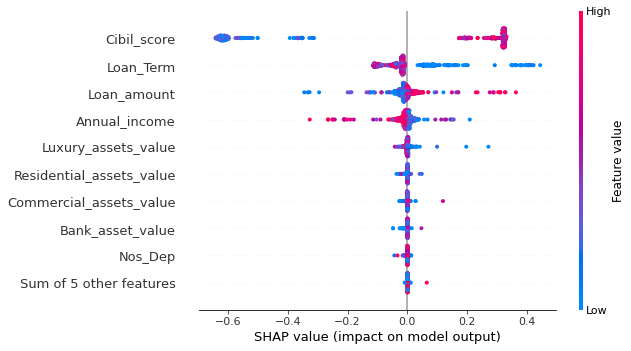

In [63]:
shap.plots.beeswarm(shap_values_lgbm)

In [ ]:
## In our analysis, we found that cibil_score stands out as the most important factor influencing the model's predictions.

In [93]:
test_data = test_data.drop("Loan_status", axis = 1)
test_data["Loan_Status_Pedicted"] = model.predict(test_data)

## CONCLUSION
## In our analysis, we found that cibil_score stands out as the most important factor influencing the model's predictions. Further research could delve deeper TO LOinto qualitative aspects such as loan purpose, borrower credit history, and economic conditions. Additionally, considering a wider range of features and employing advanced machine learning techniques could provide a more nuanced understanding of loan approval dynamics.